# Part 2 - Classification
- Here's an application of machine learning that could save your life! For this section of the assignment we will be working with the UCI Mushroom Data Set stored in readonly/mushrooms.csv. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('./datasets/mushroom.csv')
df = pd.get_dummies(df)

X = df.iloc[:, 2:]
y = df.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)

X_subset = X_test
y_subset = y_test

## Question 5
- Using `X_train2` and `y_train2` from the preceeding cell, train a DecisionTreeClassifier with default parameters and `random_state=0`. What are the 5 most important features found by the decision tree?

- As a reminder, the feature names are available in the `X_train2.columns` property, and the order of the features in `X_train2.columns` matches the order of the feature importance values in the classifier's `feature_importances_` property.

- This function should return a list of length 5 containing the feature names in descending order of importance.

- Note: remember that you also need to set `random_state` in the DecisionTreeClassifier.

In [2]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
df_res = pd.DataFrame({'feature_name': X_train.columns.values, 'feature_important': clf.feature_importances_})
res = df_res.sort_values('feature_important', ascending=False)
res = res.head(5)
list(res['feature_name'])

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

## Question 6
- For this question, we're going to use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for a Support Vector Classifier (SVC) with varying parameter values. Recall that the validation_curve function, in addition to taking an initialized unfitted classifier object, takes a dataset as input and does its own internal train-test splits to compute results.

**Because creating a validation curve requires fitting multiple models, for performance reasons this question will use just a subset of the original mushroom dataset: please use the variables X_subset and y_subset as input to the validation curve function (instead of X_mush and y_mush) to reduce computation time.**

- The initialized unfitted classifier object we'll be using is a Support Vector Classifier with radial basis kernel. So your first step is to create an SVC object with default parameters (i.e. kernel='rbf', C=1) and random_state=0. Recall that the kernel width of the RBF kernel is controlled using the gamma parameter.

- With this classifier, and the dataset in X_subset, y_subset, explore the effect of gamma on classifier accuracy by using the validation_curve function to find the training and test scores for 6 values of gamma from 0.0001 to 10 (i.e. np.logspace(-4,1,6)). Recall that you can specify what scoring metric you want validation_curve to use by setting the "scoring" parameter. In this case, we want to use "accuracy" as the scoring metric.

- For each level of gamma, validation_curve will fit 3 models on different subsets of the data, returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets.

- Find the mean score across the three models for each level of gamma for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

- e.g. if one of your array of scores is

array([[ 0.5,  0.4,  0.6],
       [ 0.7,  0.8,  0.7],
       [ 0.9,  0.8,  0.8],
       [ 0.8,  0.7,  0.8],
       [ 0.7,  0.6,  0.6],
       [ 0.4,  0.6,  0.5]])
   
it should then become

array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])


__This function should return one tuple of numpy arrays (training_scores, test_scores) where each array in the tuple has shape (6,).__

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-4, 1, 6)
train_scores, test_score = validation_curve(SVC(C = 1, kernel = 'rbf', random_state = 0), X_subset, y_subset, param_range = param_range, param_name='gamma', scoring='accuracy', cv=3)

In [4]:
mean_train_score = train_scores.mean(axis=1)
mean_test_score = test_score.mean(axis=1)

In [5]:
mean_train_score, mean_test_score

(array([0.56646972, 0.93106844, 0.990645  , 1.        , 1.        ,
        1.        ]),
 array([0.56720827, 0.9300837 , 0.98966027, 1.        , 0.99458395,
        0.52240276]))

## Question 7
Based on the scores from question 6, what gamma value corresponds to a model that is underfitting (and has the worst test set accuracy)? What gamma value corresponds to a model that is overfitting (and has the worst test set accuracy)? What choice of gamma would be the best choice for a model with good generalization performance on this dataset (high accuracy on both training and test set)?

Hint: Try plotting the scores from question 6 to visualize the relationship between gamma and accuracy. Remember to comment out the import matplotlib line before submission.

This function should return one tuple with the degree values in this order: (Underfitting, Overfitting, Good_Generalization) Please note there is only one correct solution.

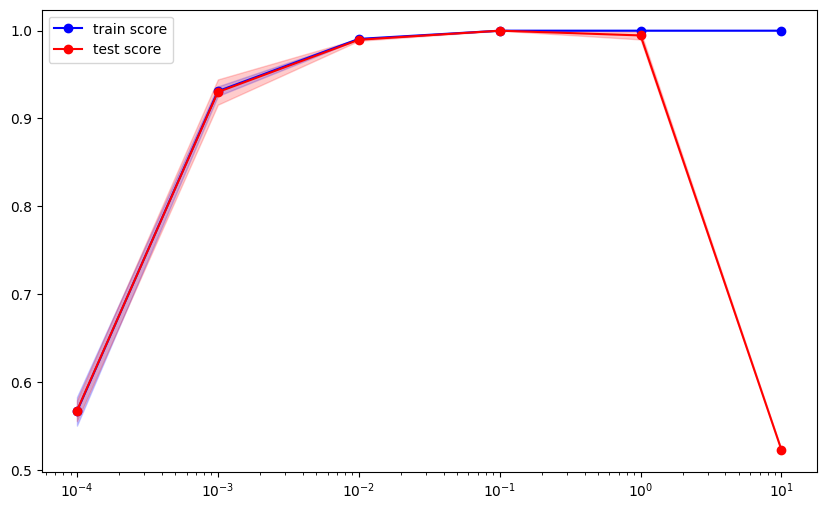

In [6]:
import matplotlib.pyplot as plt

std_train_score = np.std(train_scores, axis=1)
std_test_score = np.std(test_score, axis=1)

plt.figure(figsize=(10, 6))

plt.plot(param_range, mean_train_score, color = 'blue', label = 'train score', marker = 'o')
plt.fill_between(param_range, mean_train_score - std_train_score, mean_train_score + std_train_score, color = 'blue', alpha = 0.2)

plt.plot(param_range, mean_test_score, color = 'red', label = 'test score', marker = 'o')
plt.fill_between(param_range, mean_test_score - std_test_score, mean_test_score + std_test_score, color = 'red', alpha = 0.2)

plt.xscale('log')
plt.legend(loc = 'best')

In [7]:
underfitting = 1e-4   
good_generalization = 1e-1 
overfitting = 10